<img src="Figs/banner.png" width="100%" />


<span style="color:blue">

## Part-I

</span>


The objectives of this part are as follows:
- Reading raw band file and exploring its properties. 
- Reading metadata file and extracting scaling factors. 
- Conversion of 16-bit Digital Numbers (DNs) to Reflectance.
- Plotting the converted band file and observing its features.
- Croping specific area of interest to explore it in detail. 

In [1]:
import os
import numpy as np
import rioxarray as rx
import rasterio
import matplotlib.pyplot as plt
#%matplotlib widget

<div style="background-color:lightblue; padding:10px;">

__Landsat-9 Bands:__

- **Band-1**: Visible Coastal Aerosol (0.43 - 0.45 µm) 30-m.
- **Band-2**: Visible Blue (0.450 - 0.51 µm) 30-m.
- **Band-3**: Visible Green (0.53 - 0.59 µm) 30-m.
- **Band-4**: Red (0.64 - 0.67 µm) 30-m.
- **Band-5**: Near-Infrared (0.85 - 0.88 µm) 30-m.
- **Band-6**: SWIR 1(1.57 - 1.65 µm) 30-m.
- **Band-7**: SWIR 2 (2.11 - 2.29 µm) 30-m.
- **Band-8**: Panchromatic (PAN) (0.50 - 0.68 µm) 15-m.
- **Band-9**: Cirrus (1.36 - 1.38 µm) 30-m.

</div>

> Setting up local directory

In [2]:
rootDirectory = r"your path here..."
# reading specific band
band = 4
band_filename = rootDirectory+f"LC09_L2SP_150038_20240803_20240804_02_T1_SR_B{band}.TIF"

<div style="background-color:lightblue; padding:10px;">

Level-2 data products consist of quantized and calibrated scaled Digital Numbers (DN) representing the multispectral image data.  Landsat 8 and Landsat 9 data are delivered in 16-bit unsigned integer format. Landsat 1-7 products are delivered in 8-bit unsigned integer format. Landsat Level-1 data can be converted to TOA spectral radiance, reflective band DN’s can be converted to TOA reflectance, and thermal band data can be converted from spectral radiance to TOA  brightness temperature.
[Read more here](https://www.usgs.gov/landsat-missions/using-usgs-landsat-level-1-data-product).

</div>

In [3]:
dn_image = rx.open_rasterio(band_filename)
dn_image

<xarray.DataArray (band: 1, y: 7921, x: 7791)> Size: 123MB
[61712511 values with dtype=uint16]
Coordinates:
  * band         (band) int64 8B 1
  * x            (x) float64 62kB 1.44e+05 1.44e+05 ... 3.777e+05 3.777e+05
  * y            (y) float64 63kB 3.633e+06 3.633e+06 ... 3.395e+06 3.395e+06
    spatial_ref  int64 8B 0
Attributes:
    AREA_OR_POINT:  Point
    _FillValue:     0
    scale_factor:   1.0
    add_offset:     0.0


### Computing Reflectance


<div style="background-color:lightblue; padding:10px;">

Reflective band DN’s can be converted to TOA reflectance using the rescaling coefficients in the MTL file:  

where:

$$ \rho_{λ}^{'} = M_{\rho} Q_{cal } + A_{\rho}$$

- $\rho_{λ}^{'}$ = TOA planetary reflectance.
- $M_{\rho}$ = Band-specific multiplicative rescaling factor from the metadata (`REFLECTANCE_MULT_BAND_x`, where x is the band number)
- $A_{\rho}$= Band-specific additive rescaling factor from the metadata (`REFLECTANCE_ADD_BAND_x`, where x is the band number)
- $Q_{cal }$ =  Quantized and calibrated standard product pixel values (`DN`)  

</div>

> Reading and extracting metadata file named as:
`LC09_L2SP_150038_20240803_20240804_02_T1_MTL.txt`

In [8]:
Landsat9_mtt_dict = {}

# Reading in the metadata
metadata_filename =  rootDirectory+"LC09_L2SP_150038_20240803_20240804_02_T1_MTL.txt"
with open(metadata_filename, 'r') as _:
    for line in _:
        line = line.strip()
        if line != 'END':
            key, value = line.split('=')
            key = key.rstrip()
            Landsat9_mtt_dict[key] = value

key = None
value = None

> Reading `multiplicative` and `additive` factors for specific band to calculate the reflectance from DNs.

In [12]:
m_lambda = float(Landsat9_mtt_dict[f"REFLECTANCE_MULT_BAND_{band}"]); 
print(f"The multiplicative factor is {m_lambda}.")

a_lambda = float(Landsat9_mtt_dict[f"REFLECTANCE_ADD_BAND_{band}"]); 
print(f"The additive term is {a_lambda}.")

The multiplicative factor is 2e-05.
The additive term is -0.1.


> Calculation for conversion of DNs to reflectance:

In [33]:
reflectance_band = m_lambda * dn_image + a_lambda
#dn_image = None #it is best to clear the variable to save the memory

> Plotting the bands

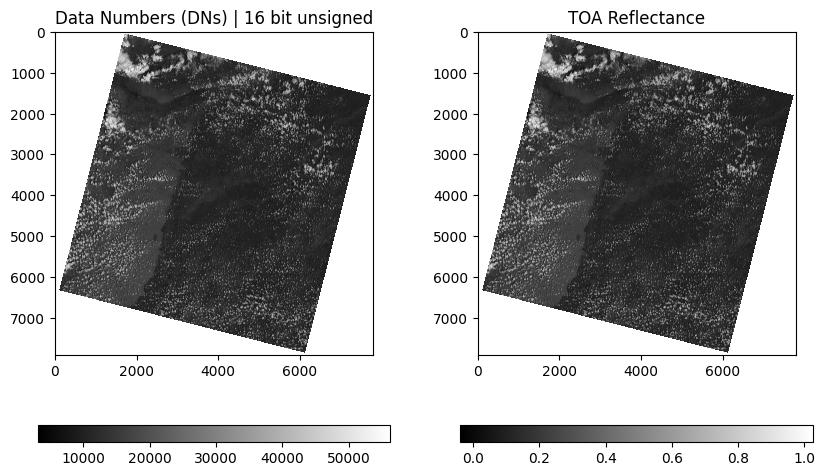

In [34]:
# Access the no data value
no_data_value = dn_image.rio.nodata

no_data_mask = (dn_image == no_data_value)

plt.figure('GMT vs TIFF', figsize=(10, 6))
plt.subplot(1,2,1)
im1 = plt.imshow(dn_image.sel(band = 1).where(~no_data_mask), cmap='gray')
ax1 = im1.axes
ax1.set_title('Data Numbers (DNs) | 16 bit unsigned')
plt.colorbar(im1, orientation='horizontal')

plt.subplot(1,2,2)
im2 = plt.imshow(reflectance_band.sel(band=1).where(~no_data_mask), cmap='gray')
ax2 = im2.axes
ax2.set_title('TOA Reflectance')
plt.colorbar(im2, orientation='horizontal')
plt.show()

<div style="background-color:pink; padding:10px;">

What is the difference between the two images?

</div>

<div style="background-color:lightgreen; padding:10px;">

### Excercise
    
- Write a function which will accept root directory, band number, metadata dictionary and return the TOA?
- Calculate the TOA of 2-6 bands.

<br>

<details><summary>Hints</summary>

* You can use the steps performed in the previous celss to write function.
* Loop over the number of bands and call the function to calculate TOA of every band.

</details>
    
    
</div>

In [4]:
def TOA_calculation(root_directory, band_numb, metadata_dict):
    
 #your code here...

    return(TOA_band)

> Cropping region of interest

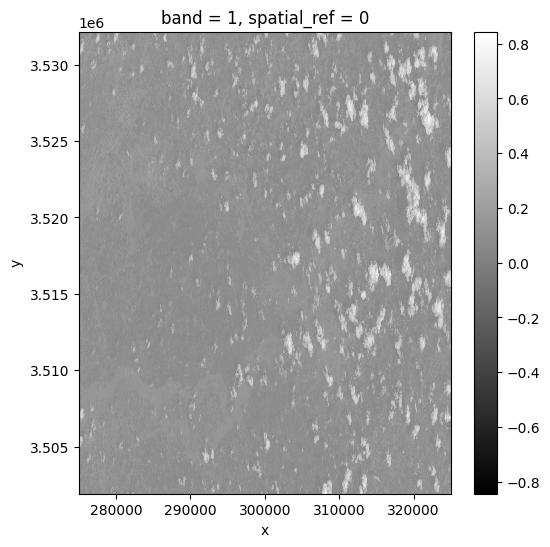

In [15]:
# Define the slice boundaries for zooming in (row and column indices)
col_start, col_end = 275000, 325000  # Adjust these values based on the area of interest
row_start, row_end = int(3532161.399690), int(3501924.303435)

# Slice the array to zoom in
zoomed_in_area = reflectance_band.sel(y=slice(row_start, row_end), x=slice(col_start, col_end))
zoomed_in_area.plot(figsize = (6,6),cmap = 'gray')

In [ ]:
def get_slice(band, col_start, col_end, row_start, row_end):
  
  #your code here....

    return band_slice


<span style="color:blue">

## Break 10 mins

</span>

<span style="color:blue">

## Part-II

</span>

The objectives of this part are as follows:
- Stretching band values using min-max technique.
- How to stack bands?
- Exploring different composites and coressponding feature values.
- Computing Normalized difference Vegetation Index (NDVI) and Normalized Difference Water Index (NDWI).

>Plotting histogram of the band

Text(0.5, 1.0, 'Histogram of TOA band4')

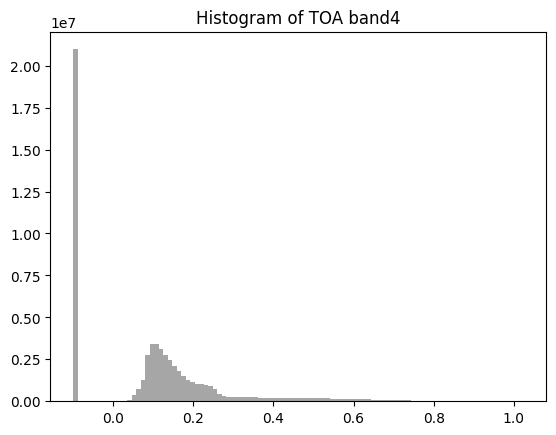

In [19]:
plt.hist(reflectance_band.values.flatten(), bins=100, color = 'gray', alpha=0.7)
plt.title(f"Histogram of TOA band-{band}")

In [35]:
def min_max_stretch(band, new_min, new_max, data_type):
    """
    This function will stretch the input band to new values to enhance the contrast of the colors.
    
    Inputs:
    - band [2D array]: the band to be stretched.
    - new_min [int/float]: target new minimum value
    - new_max [int/float]: target new maximum value
    - data_type [str]: data type of the target band i.e. float32/float64, int8/int16
    
    Output:
    - stretched_band [2D array]: the stretched band
    """
    min_val = band.min()
    max_val = band.max()

    stretched_band = (band - min_val) / (max_val - min_val) * (new_max - new_min) + new_min


    if data_type == 'int8':
        stretched_band = np.clip(stretched_band, new_min, new_max).astype(np.uint8)  # Ensure values are within range
    elif data_type == 'int16':
        stretched_band = np.clip(stretched_band, new_min, new_max).astype(np.uint16)  # Ensure values are within range
    elif data_type == 'float32':
        stretched_band = np.clip(stretched_band, new_min, new_max).astype(np.float32)  # Ensure values are within range
    else:
        stretched_band = np.clip(stretched_band, new_min, new_max).astype(np.float64)  # Ensure values are within range

    return stretched_band

In [36]:
stretched_band = min_max_stretch(reflectance_band, 0, 1, 'float32')

Text(0.5, 1.0, 'Histogram of TOA stretched band-4')

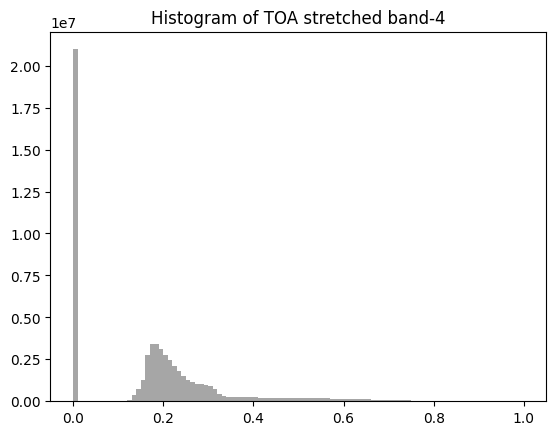

In [37]:
plt.hist(stretched_band.values.flatten(), bins=100, color = 'gray', alpha=0.7)
plt.title(f"Histogram of TOA stretched band-{band}")

### Composites

#### Natural Color Image
> band combination: 4,3,2

In [47]:
band_4           = TOA_calculation(rootDirectory, 4, Landsat9_mtt_dict)
stretched_band_4 = min_max_stretch(band_4, 0, 1, 'float32')

band_3           = TOA_calculation(rootDirectory, 3, Landsat9_mtt_dict)
stretched_band_3 = min_max_stretch(band_3, 0, 1, 'float32')

band_2           = TOA_calculation(rootDirectory, 2, Landsat9_mtt_dict)
stretched_band_2 = min_max_stretch(band_2, 0, 1, 'float32')

composite_432 = np.zeros((dn_image.shape[1], dn_image.shape[2], 3), dtype=np.float32)

composite_432[..., 0] = stretched_band_4.sel(band=1) #red band
composite_432[..., 1] = stretched_band_3.sel(band=1) #green band
composite_432[..., 2] = stretched_band_2.sel(band=1) #blue band

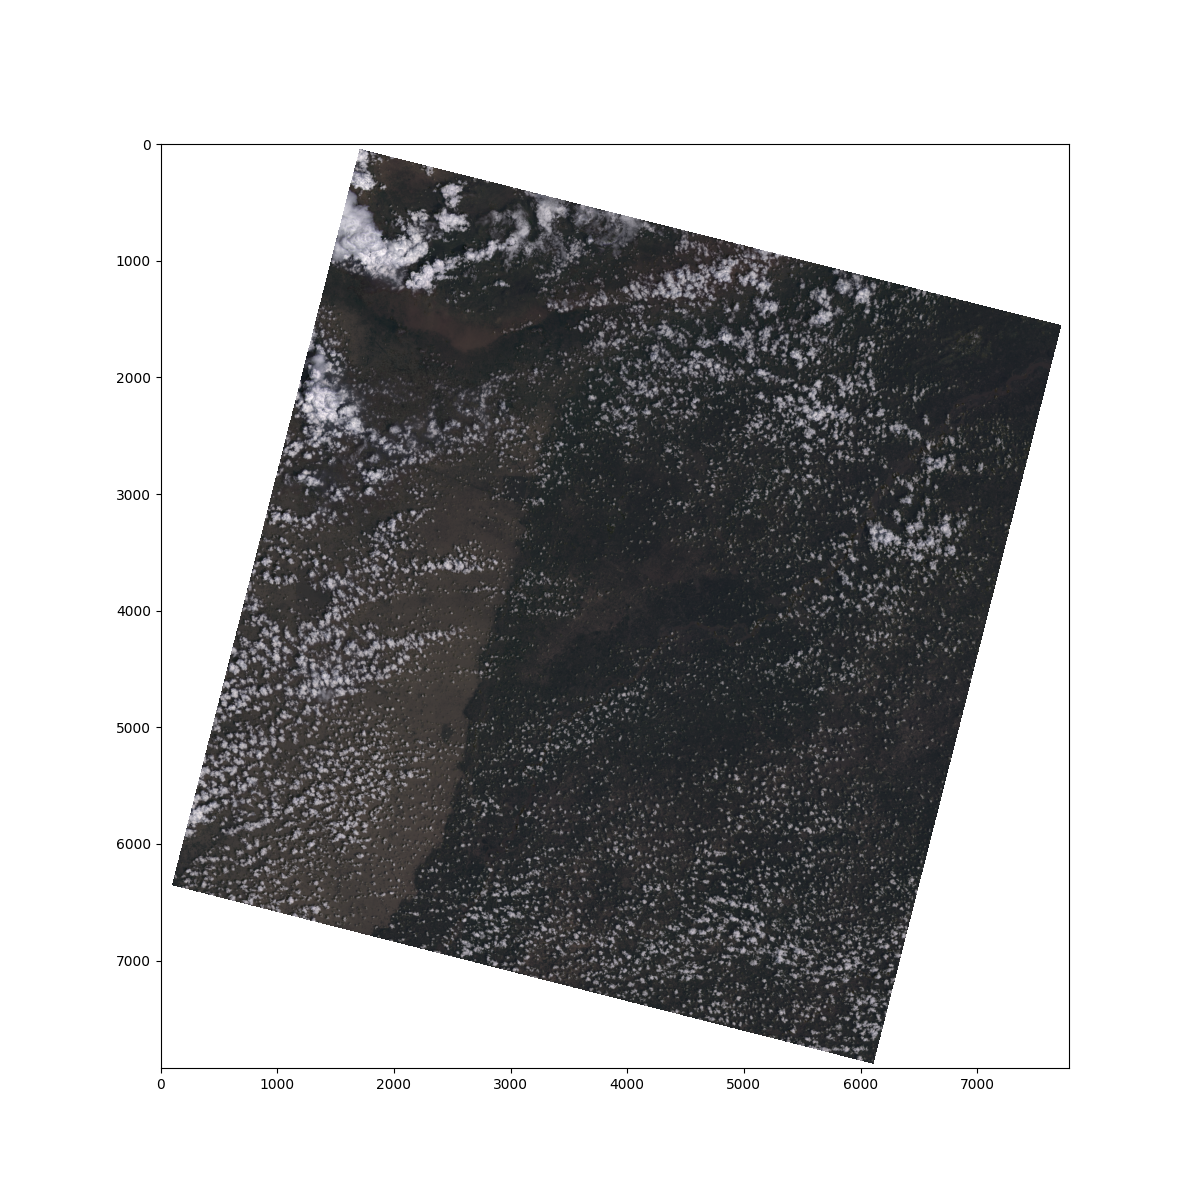

In [52]:
plt.figure(figsize=(12,12))
plt.imshow(composite_432)

> saving the composite as raster image

In [48]:
prImage = rasterio.open('composit_432.tif','w',driver='Gtiff',
                          width=dn_image.shape[2], 
                          height = dn_image.shape[1], 
                          count=3, crs=dn_image.rio.crs, 
                          transform=dn_image.rio.transform(), 
                          dtype='float32')

prImage.write(composite_432.transpose(2,0,1))
prImage.close()

<div style="background-color:lightgreen; padding:10px;">

### Excercise
    
- Compute the composite `356`, `653` and observe the features of the image. 

</div>